In [2]:
import numpy as np  
from matplotlib import pyplot
import pandas as pd    
import matplotlib.pyplot as plt 
%matplotlib inline 
import seaborn as sns
from sklearn.model_selection import train_test_split # Sklearn package's randomized data splitting function
import math # log function is inside this library
from sklearn import metrics

import lightgbm as lgb
import xgboost as xgb

from sklearn.model_selection import GridSearchCV

import itertools
from sklearn.metrics import mean_squared_error
from scipy.stats import pearsonr
from sklearn.model_selection import KFold
from sklearn import feature_extraction, model_selection, preprocessing
from sklearn.utils import resample

from scipy.stats import zscore
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import cophenet,dendrogram, linkage
from scipy.cluster.hierarchy import fcluster
from scipy.spatial.distance import pdist
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.decomposition import PCA
from sklearn.svm import SVC
from sklearn.model_selection import ShuffleSplit
from lightgbm import LGBMClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_predict, cross_val_score
from sklearn.metrics import accuracy_score, precision_score, recall_score


In [3]:
??PCA

### Background

Four "Corgie" model vehicles were used for the experiment: a double decker bus, Cheverolet van, Saab 9000 and an Opel Manta 400 cars. This particular combination of vehicles was chosen with the expectation that the bus, van and either one of the cars would be readily distinguishable, but it would be more difficult to distinguish between the cars.

### Problem Statement

The purpose of the case study is to classify a given silhouette as one of four different types of vehicle, using a set of features extracted from the silhouette. The vehicle may be viewed from one of many different angles.
The purpose is to classify a given silhouette as one of three types of vehicle, using a set of features extracted from the silhouette. The vehicle may be viewed from one of many different angles.


#### Import data

In [155]:
df_data = pd.read_csv('vehicle.csv')

### EDA

#### 1.	Univariate analysis

In [156]:
# initial inspection
df_data

compactness  circularity  distance_circularity  radius_ratio  \
0             95         48.0                  83.0         178.0   
1             91         41.0                  84.0         141.0   
2            104         50.0                 106.0         209.0   
3             93         41.0                  82.0         159.0   
4             85         44.0                  70.0         205.0   
..           ...          ...                   ...           ...   
841           93         39.0                  87.0         183.0   
842           89         46.0                  84.0         163.0   
843          106         54.0                 101.0         222.0   
844           86         36.0                  78.0         146.0   
845           85         36.0                  66.0         123.0   

     pr.axis_aspect_ratio  max.length_aspect_ratio  scatter_ratio  \
0                    72.0                       10          162.0   
1                    57.0                        9          149.0   
2                    66.0                       10          207.0   
3                    63.0                        9          144.0   
4                   103.0                       52          149.0   
..                    ...                      ...            ...   
841                  64.0                        8          169.0   
842                  66.0                       11          159.0   
843                  67.0                       12          222.0   
844                  58.0                        7          135.0   
845                  55.0                        5          120.0   

     elongatedness  pr.axis_rectangularity  max.length_rectangularity  \
0             42.0                    20.0                        159   
1             45.0                    19.0                        143   
2             32.0                    23.0                        158   
3             46.0                    19.0                        143   
4             45.0                    19.0                        144   
..             ...                     ...                        ...   
841           40.0                    20.0                        134   
842           43.0                    20.0                        159   
843           30.0                    25.0                        173   
844           50.0                    18.0                        124   
845           56.0                    17.0                        128   

     scaled_variance  scaled_variance.1  scaled_radius_of_gyration  \
0              176.0              379.0                      184.0   
1              170.0              330.0                      158.0   
2              223.0              635.0                      220.0   
3              160.0              309.0                      127.0   
4              241.0              325.0                      188.0   
..               ...                ...                        ...   
841            200.0              422.0                      149.0   
842            173.0              368.0                      176.0   
843            228.0              721.0                      200.0   
844            155.0              270.0                      148.0   
845            140.0              212.0                      131.0   

     scaled_radius_of_gyration.1  skewness_about  skewness_about.1  \
0                           70.0             6.0              16.0   
1                           72.0             9.0              14.0   
2                           73.0            14.0               9.0   
3                           63.0             6.0              10.0   
4                          127.0             9.0              11.0   
..                           ...             ...               ...   
841                         72.0             7.0              25.0   
842                         72.0             1.0              20.0   

In [157]:
df_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 846 entries, 0 to 845
Data columns (total 19 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   compactness                  846 non-null    int64  
 1   circularity                  841 non-null    float64
 2   distance_circularity         842 non-null    float64
 3   radius_ratio                 840 non-null    float64
 4   pr.axis_aspect_ratio         844 non-null    float64
 5   max.length_aspect_ratio      846 non-null    int64  
 6   scatter_ratio                845 non-null    float64
 7   elongatedness                845 non-null    float64
 8   pr.axis_rectangularity       843 non-null    float64
 9   max.length_rectangularity    846 non-null    int64  
 10  scaled_variance              843 non-null    float64
 11  scaled_variance.1            844 non-null    float64
 12  scaled_radius_of_gyration    844 non-null    float64
 13  scaled_radius_of_gyr

Note:

845 rows, 19 columns. There are some null values in the data

In [158]:
df_data.isnull().sum()

compactness                    0
circularity                    5
distance_circularity           4
radius_ratio                   6
pr.axis_aspect_ratio           2
max.length_aspect_ratio        0
scatter_ratio                  1
elongatedness                  1
pr.axis_rectangularity         3
max.length_rectangularity      0
scaled_variance                3
scaled_variance.1              2
scaled_radius_of_gyration      2
scaled_radius_of_gyration.1    4
skewness_about                 6
skewness_about.1               1
skewness_about.2               1
hollows_ratio                  0
class                          0
dtype: int64

In [159]:
df_label = df_data.pop('class')

In [160]:
# labels need to be encoded for use with classifier
le = preprocessing.LabelEncoder()
Y = le.fit_transform(df_label) 

In [161]:
df_features = df_data.copy()

The missing values can be replaced with the mean value

In [162]:
medianFiller = lambda x: x.fillna(x.median())
df_features = df_features.apply(medianFiller,axis=0)

In [163]:
df_features.isnull().sum()

compactness                    0
circularity                    0
distance_circularity           0
radius_ratio                   0
pr.axis_aspect_ratio           0
max.length_aspect_ratio        0
scatter_ratio                  0
elongatedness                  0
pr.axis_rectangularity         0
max.length_rectangularity      0
scaled_variance                0
scaled_variance.1              0
scaled_radius_of_gyration      0
scaled_radius_of_gyration.1    0
skewness_about                 0
skewness_about.1               0
skewness_about.2               0
hollows_ratio                  0
dtype: int64

In [164]:
# detail inspection
df_features.describe().transpose()

count        mean         std    min     25%  \
compactness                  846.0   93.678487    8.234474   73.0   87.00   
circularity                  846.0   44.823877    6.134272   33.0   40.00   
distance_circularity         846.0   82.100473   15.741569   40.0   70.00   
radius_ratio                 846.0  168.874704   33.401356  104.0  141.00   
pr.axis_aspect_ratio         846.0   61.677305    7.882188   47.0   57.00   
max.length_aspect_ratio      846.0    8.567376    4.601217    2.0    7.00   
scatter_ratio                846.0  168.887707   33.197710  112.0  147.00   
elongatedness                846.0   40.936170    7.811882   26.0   33.00   
pr.axis_rectangularity       846.0   20.580378    2.588558   17.0   19.00   
max.length_rectangularity    846.0  147.998818   14.515652  118.0  137.00   
scaled_variance              846.0  188.596927   31.360427  130.0  167.00   
scaled_variance.1            846.0  439.314421  176.496341  184.0  318.25   
scaled_radius_of_gyration    846.0  174.706856   32.546277  109.0  149.00   
scaled_radius_of_gyration.1  846.0   72.443262    7.468734   59.0   67.00   
skewness_about               846.0    6.361702    4.903244    0.0    2.00   
skewness_about.1             846.0   12.600473    8.930962    0.0    5.00   
skewness_about.2             846.0  188.918440    6.152247  176.0  184.00   
hollows_ratio                846.0  195.632388    7.438797  181.0  190.25   

                               50%     75%     max  
compactness                   93.0  100.00   119.0  
circularity                   44.0   49.00    59.0  
distance_circularity          80.0   98.00   112.0  
radius_ratio                 167.0  195.00   333.0  
pr.axis_aspect_ratio          61.0   65.00   138.0  
max.length_aspect_ratio        8.0   10.00    55.0  
scatter_ratio                157.0  198.00   265.0  
elongatedness                 43.0   46.00    61.0  
pr.axis_rectangularity        20.0   23.00    29.0  
max.length_rectangularity    146.0  159.00   188.0  
scaled_variance              179.0  217.00   320.0  
scaled_variance.1            363.5  586.75  1018.0  
scaled_radius_of_gyration    173.5  198.00   268.0  
scaled_radius_of_gyration.1   71.5   75.00   135.0  
skewness_about                 6.0    9.00    22.0  
skewness_about.1              11.0   19.00    41.0  
skewness_about.2             188.0  193.00   206.0  
hollows_ratio                197.0  201.00   211.0

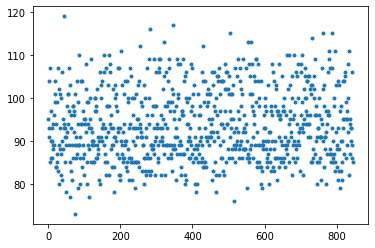

In [165]:
plt.plot(df_features.compactness,'.')

Note: Based only on compactness, it looks like the data was sampled at random.

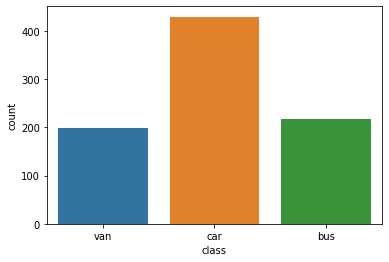

In [166]:
sns.countplot(df_label)

Note: the labels are slightly imballanced, with car being around double the other two classes.

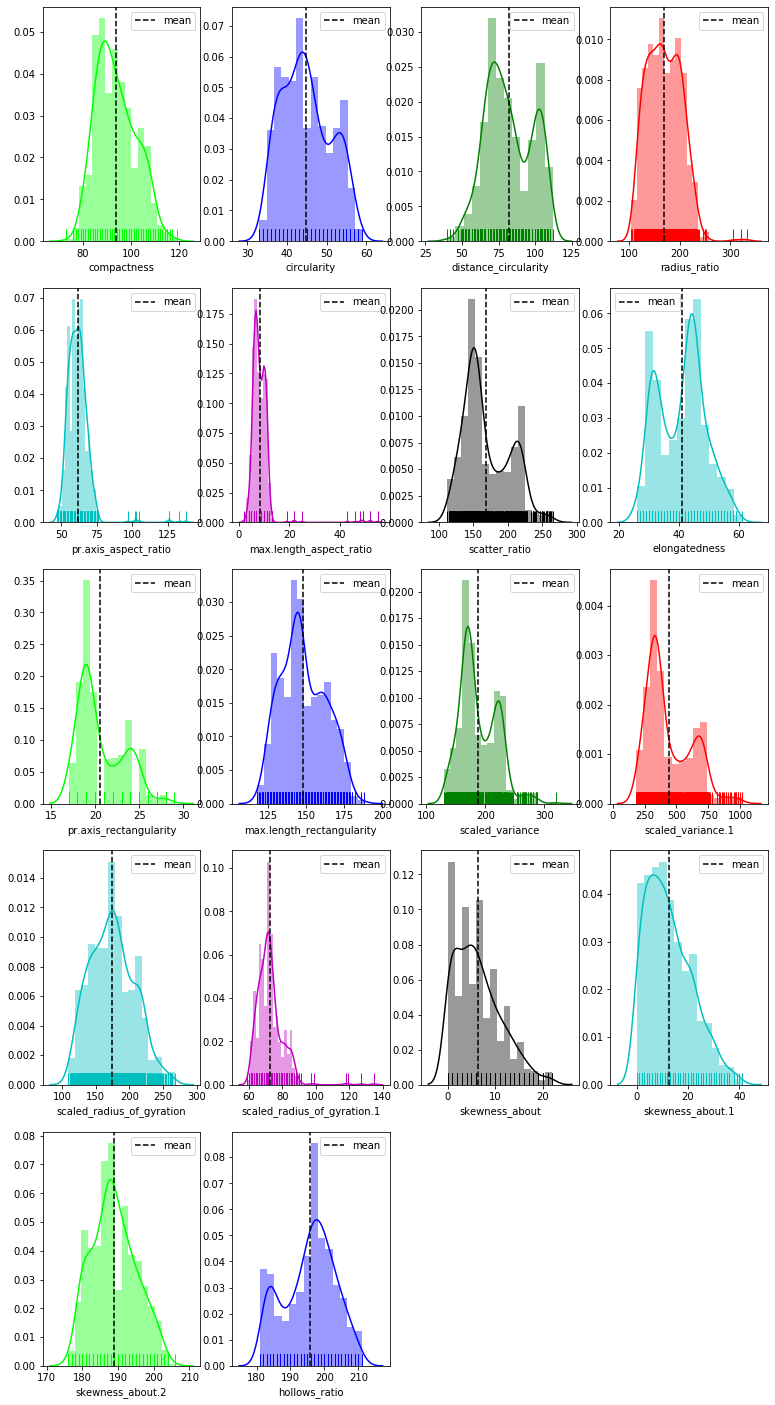

In [167]:
column_list = df_features.columns
cols = column_list.to_list()

colors = ["lime","b","g","r","c","m","k","c","lime","b","g","r","c","m","k","c","lime","b"]
fig = plt.figure(figsize=(13,25))

for i,j,k in itertools.zip_longest(cols,range(len(cols)),colors):
    plt.subplot(5,4,j+1)
    ax = sns.distplot(df_features[i],color=k,rug=True)
    ax.set_facecolor("w")
    plt.axvline(df_features[i].mean(),linestyle="dashed",label="mean",color="k")
    plt.legend(loc="best")

[Text(0, 0, 'compactness'),
 Text(0, 0, 'circularity'),
 Text(0, 0, 'distance_circularity'),
 Text(0, 0, 'radius_ratio'),
 Text(0, 0, 'pr.axis_aspect_ratio'),
 Text(0, 0, 'max.length_aspect_ratio'),
 Text(0, 0, 'scatter_ratio'),
 Text(0, 0, 'elongatedness'),
 Text(0, 0, 'pr.axis_rectangularity'),
 Text(0, 0, 'max.length_rectangularity'),
 Text(0, 0, 'scaled_variance'),
 Text(0, 0, 'scaled_variance.1'),
 Text(0, 0, 'scaled_radius_of_gyration'),
 Text(0, 0, 'scaled_radius_of_gyration.1'),
 Text(0, 0, 'skewness_about'),
 Text(0, 0, 'skewness_about.1'),
 Text(0, 0, 'skewness_about.2'),
 Text(0, 0, 'hollows_ratio')]

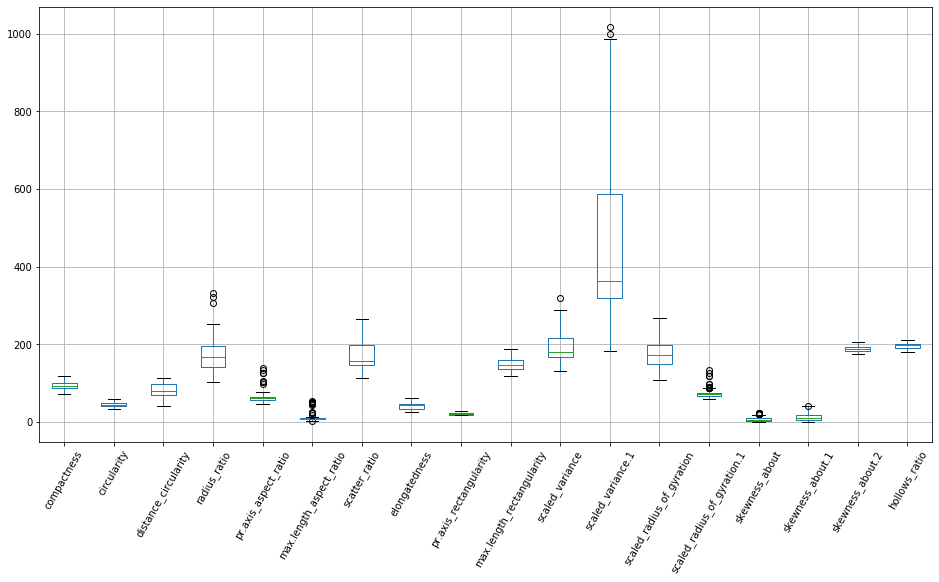

In [168]:
plt.figure(figsize=(16, 8))
bplot = df_features.boxplot()
bplot.set_xticklabels(bplot.get_xticklabels(), rotation=60)

#### Comments: 

radius_ratio, pr.axis_aspect_ratio, max.length_aspect_ratio, scaled_variance.1, scaled_radius_of_gyration.1 and skewness_about have outliers. <br>


Standard deviation can be used to detect outliers. Data points more than 3 times the standard deviation are defines as outliers. Outliers will be replaced with the median.

In [169]:
#Replacing the outliers by median
for col_name in df_features.columns:
    q1 = df_features[col_name].quantile(0.25)
    q3 = df_features[col_name].quantile(0.75)
    iqr = q3 - q1
    
    low = q1-1.5*iqr
    high = q3+1.5*iqr
    df_features.loc[(df_features[col_name] < low) | (df_features[col_name] > high), col_name] = df_features[col_name].median()

[Text(0, 0, 'compactness'),
 Text(0, 0, 'circularity'),
 Text(0, 0, 'distance_circularity'),
 Text(0, 0, 'radius_ratio'),
 Text(0, 0, 'pr.axis_aspect_ratio'),
 Text(0, 0, 'max.length_aspect_ratio'),
 Text(0, 0, 'scatter_ratio'),
 Text(0, 0, 'elongatedness'),
 Text(0, 0, 'pr.axis_rectangularity'),
 Text(0, 0, 'max.length_rectangularity'),
 Text(0, 0, 'scaled_variance'),
 Text(0, 0, 'scaled_variance.1'),
 Text(0, 0, 'scaled_radius_of_gyration'),
 Text(0, 0, 'scaled_radius_of_gyration.1'),
 Text(0, 0, 'skewness_about'),
 Text(0, 0, 'skewness_about.1'),
 Text(0, 0, 'skewness_about.2'),
 Text(0, 0, 'hollows_ratio')]

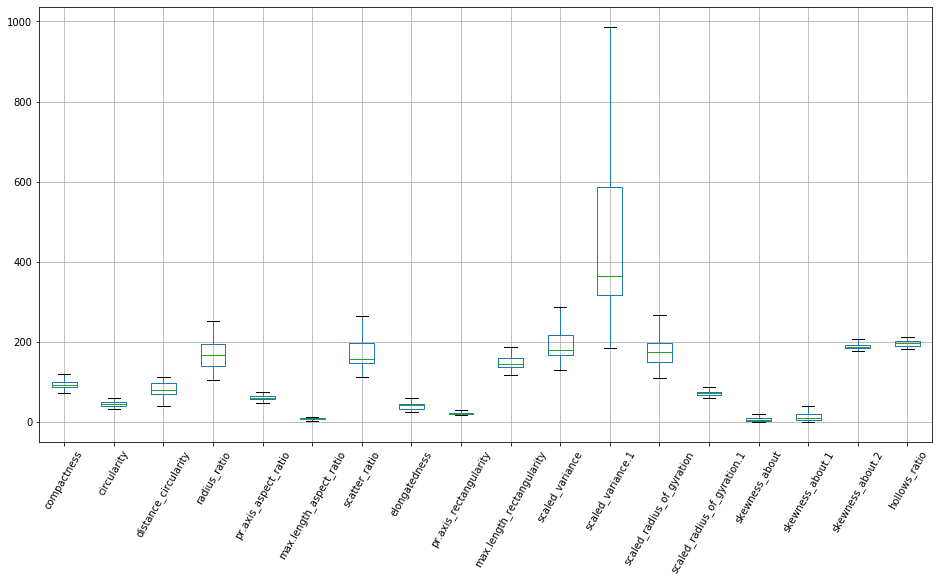

In [170]:
plt.figure(figsize=(16, 8))
bplot = df_features.boxplot()
bplot.set_xticklabels(bplot.get_xticklabels(), rotation=60)

The data does not contain any outliers after the replacement.

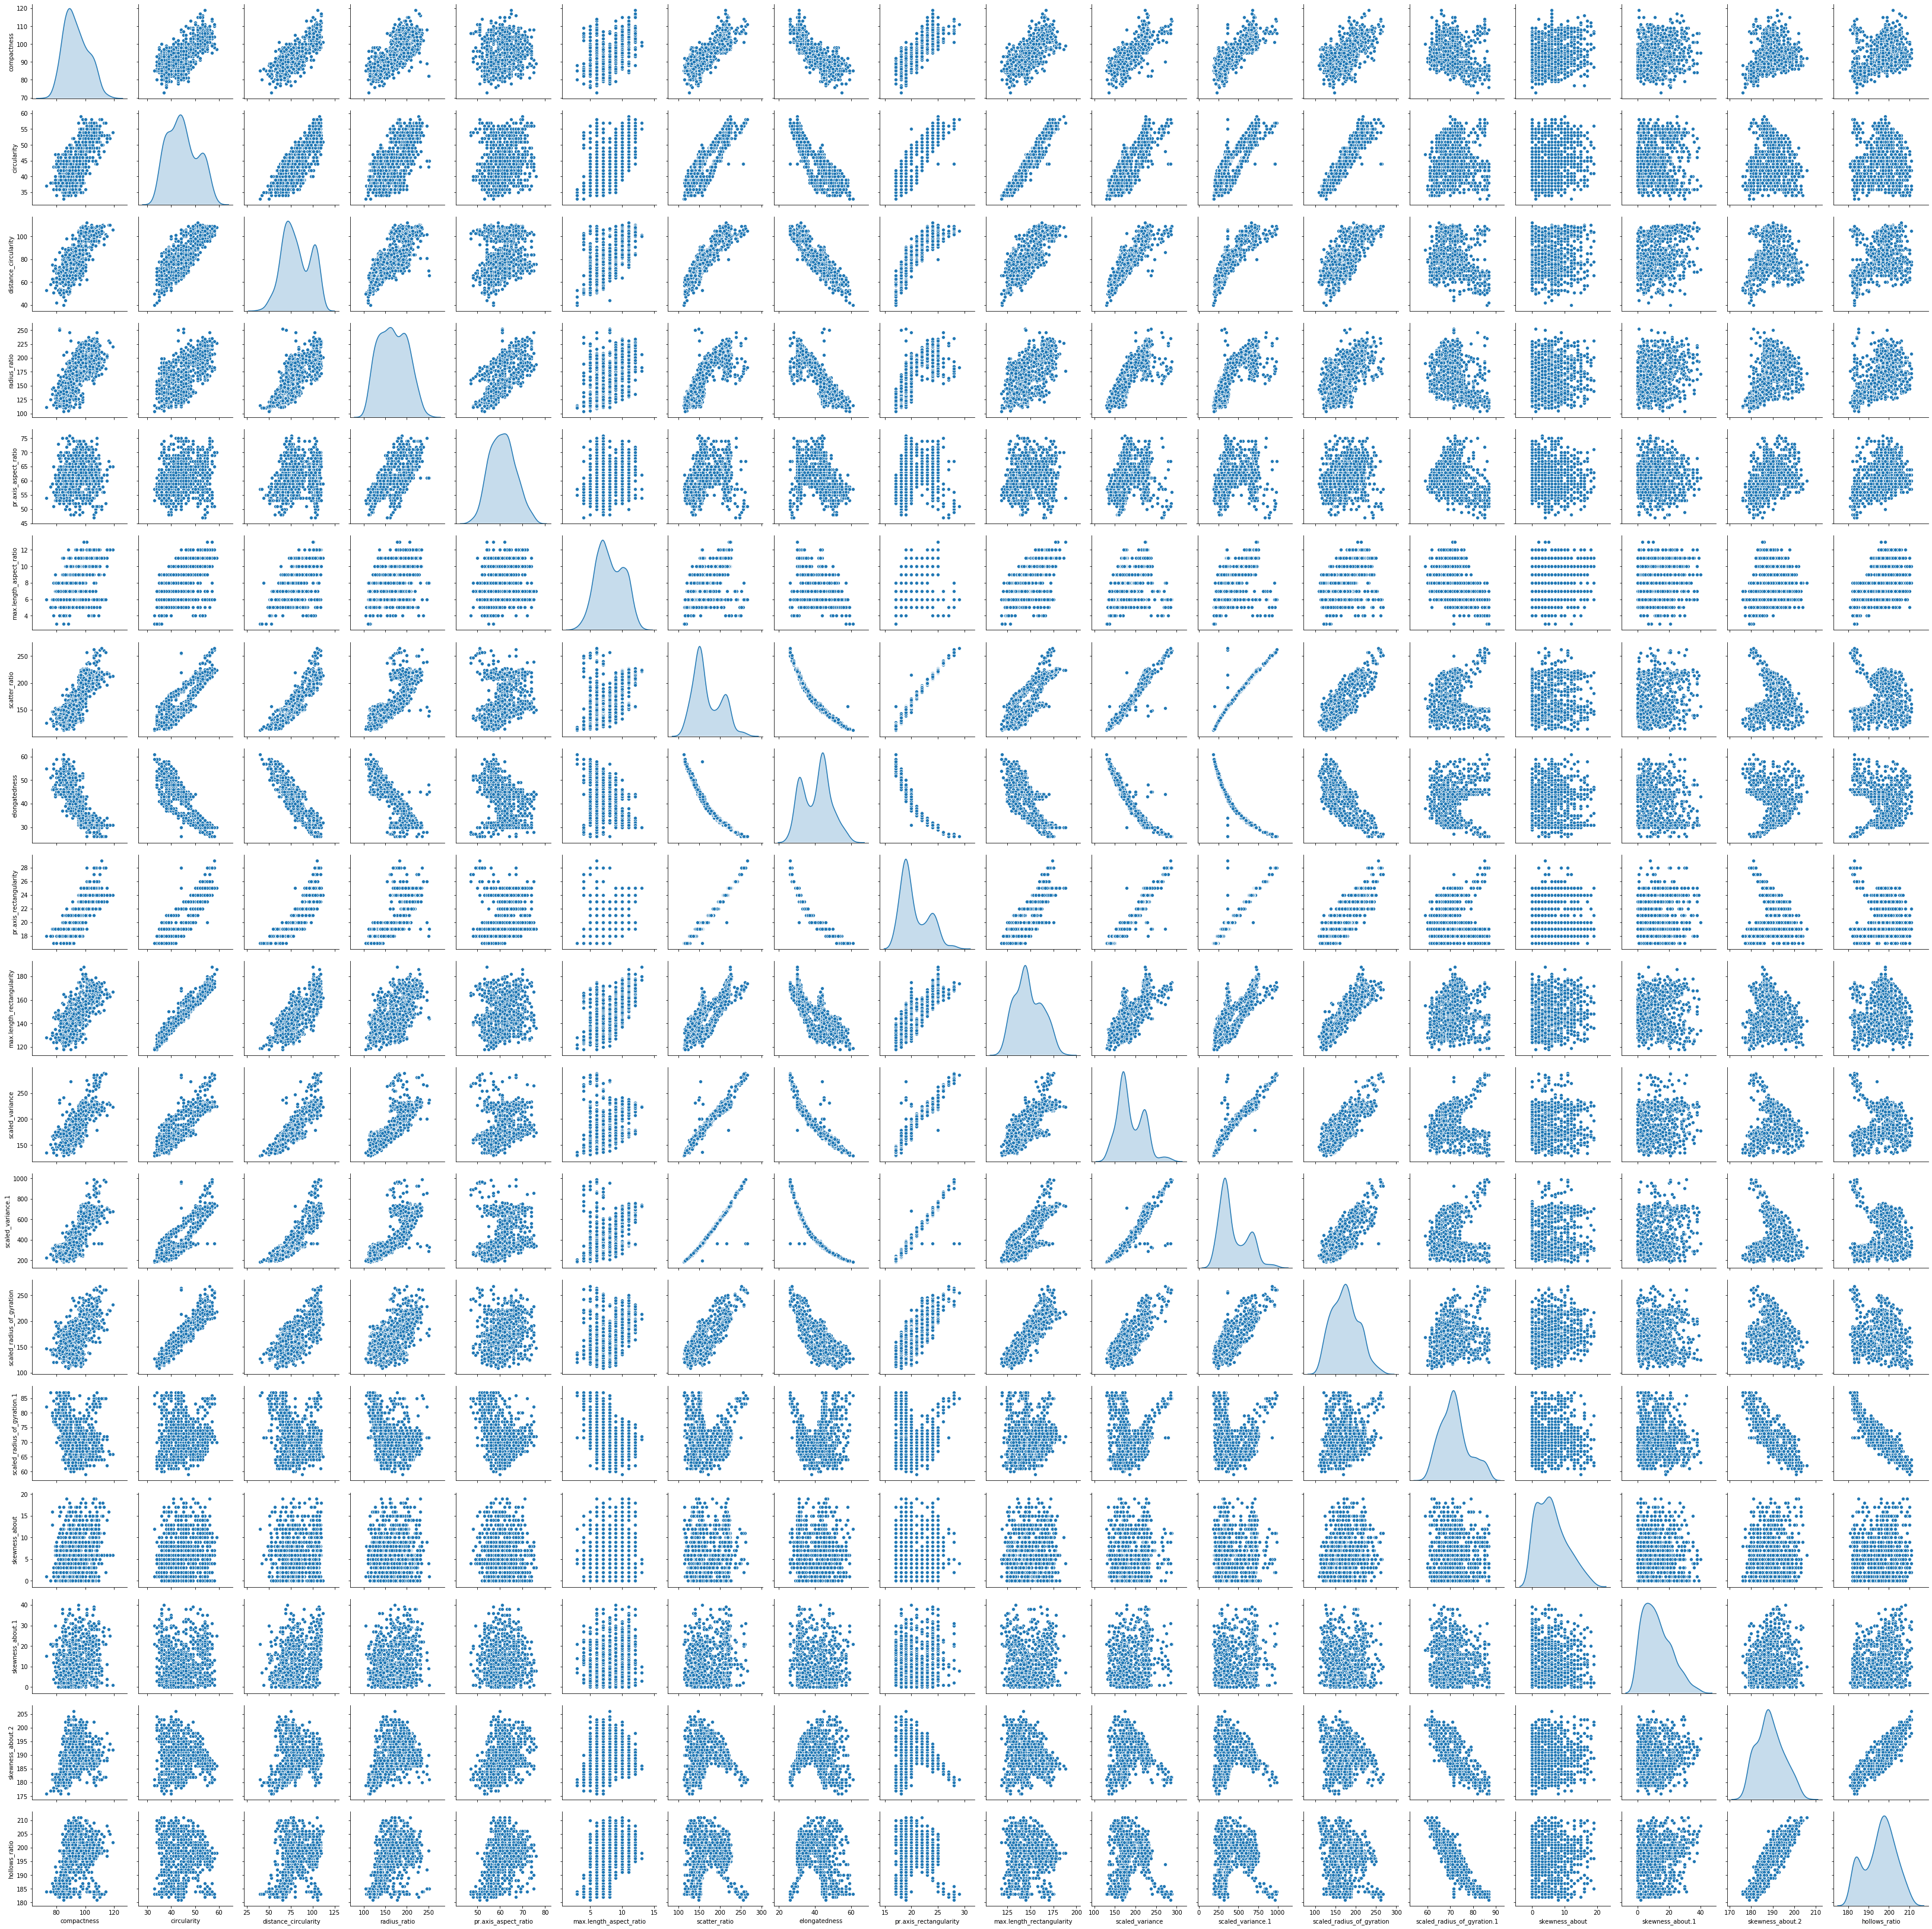

In [171]:
sns.pairplot(df_features, diag_kind = 'kde', palette="husl")

Note:

The histograms in the pairplot show that there are a few gaussians in the data. From the distributions it looks like there might be two or three. There are a few variables that show strong linear correlation.

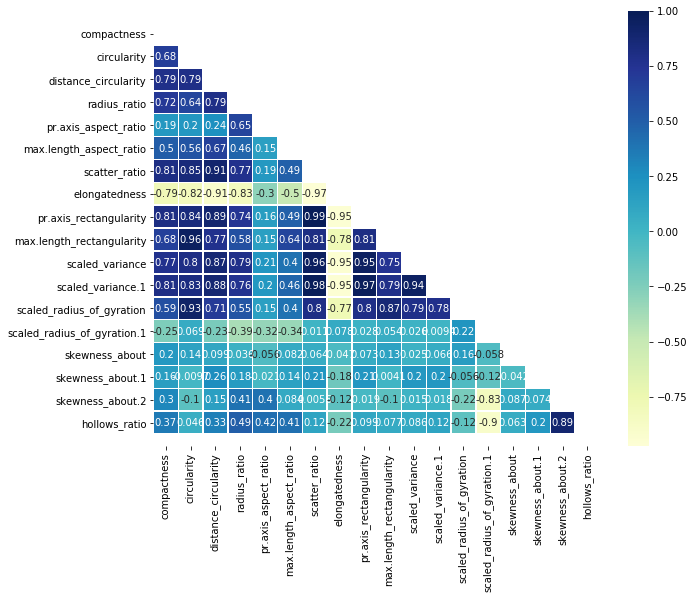

In [172]:
plt.figure(figsize=(10,8))

cor = df_features.corr()
mask = np.zeros_like(cor)
mask[np.triu_indices_from(mask)] = True
ax = sns.heatmap(cor,
            annot=True,
            linewidths=.5,
            center=0,
            cmap="YlGnBu",
                mask = mask)

bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)
plt.show()

Note:

Some of the variable have very strong correlation:<br>

pr.axis_rectangularity vs scatter_ratio<br>
elongatedness vs scatter_ratio<br>
max_length_rectangularity vs circularity<br>
scaled_variance vs scatter ratio<br>
pr.axis_rectangularity vs scaled_variance<br>

These could possibly be removed to reduce redundant information, but will be kept in the set since we will be doing PCA, and the linear relationships will be eliminated in that way.

### PCA

In [173]:
# scale the features using z-score
df_features_scaled=df_features.apply(zscore)
df_features_scaled.head()

compactness  circularity  distance_circularity  radius_ratio  \
0     0.160580     0.518073              0.057177      0.300945   
1    -0.325470    -0.623732              0.120741     -0.850666   
2     1.254193     0.844303              1.519141      1.265808   
3    -0.082445    -0.623732             -0.006386     -0.290423   
4    -1.054545    -0.134387             -0.769150      1.141310   

   pr.axis_aspect_ratio  max.length_aspect_ratio  scatter_ratio  \
0              1.933135                 0.912212      -0.207598   
1             -0.740596                 0.427456      -0.599423   
2              0.863642                 0.912212       1.148719   
3              0.328896                 0.427456      -0.750125   
4             -0.027601                -0.057300      -0.599423   

   elongatedness  pr.axis_rectangularity  max.length_rectangularity  \
0       0.136262               -0.224342                   0.758332   
1       0.520519               -0.610886                  -0.344578   
2      -1.144597                0.935290                   0.689401   
3       0.648605               -0.610886                  -0.344578   
4       0.520519               -0.610886                  -0.275646   

   scaled_variance  scaled_variance.1  scaled_radius_of_gyration  \
0        -0.400771          -0.337407                   0.285705   
1        -0.594220          -0.618623                  -0.513630   
2         1.114582           1.131806                   1.392477   
3        -0.916635          -0.739145                  -1.466683   
4         1.694930          -0.647319                   0.408680   

   scaled_radius_of_gyration.1  skewness_about  skewness_about.1  \
0                    -0.315806       -0.032330          0.387162   
1                     0.009122        0.624090          0.161740   
2                     0.171586        1.718123         -0.401818   
3                    -1.453054       -0.032330         -0.289106   
4                    -0.072110        0.624090         -0.176395   

   skewness_about.2  hollows_ratio  
0         -0.312012       0.183957  
1          0.013265       0.452977  
2         -0.149374       0.049447  
3          1.639649       1.529056  
4         -1.450481      -1.699181

In [174]:
# create covariance matrix

covMatrix = np.cov(df_features_scaled,rowvar=False)
print('Covariance Matrix \n%s', covMatrix)

Covariance Matrix 
%s [[ 1.00118343  0.68569786  0.79086299  0.72277977  0.1930925   0.50051942
   0.81358214 -0.78968322  0.81465658  0.67694334  0.77078163  0.80712401
   0.58593517 -0.24697246  0.19754181  0.1565327   0.29889034  0.36598446]
 [ 0.68569786  1.00118343  0.79325751  0.63903532  0.20349327  0.5611334
   0.8489411  -0.82244387  0.84439802  0.96245572  0.80371846  0.82844154
   0.92691166  0.06882659  0.13651201 -0.00967793 -0.10455005  0.04640562]
 [ 0.79086299  0.79325751  1.00118343  0.79516215  0.24462154  0.66759792
   0.90614687 -0.9123854   0.89408198  0.77544391  0.87061349  0.88498924
   0.70660663 -0.22962442  0.09922417  0.26265581  0.14627113  0.33312625]
 [ 0.72277977  0.63903532  0.79516215  1.00118343  0.65132393  0.46450748
   0.77085211 -0.82636872  0.74502008  0.58015378  0.78711387  0.76115704
   0.55142559 -0.39092105  0.03579728  0.17981316  0.40632957  0.49234013]
 [ 0.1930925   0.20349327  0.24462154  0.65132393  1.00118343  0.15047265
   0.19442484

In [175]:
covMatrix.shape

(18, 18)

In [176]:
#generating the eigen values and the eigen vectors
e_vals, e_vecs = np.linalg.eig(covMatrix)
print('Eigenvectors \n%s' %e_vecs)
print('\nEigenvalues \n%s' %e_vals)

Eigenvectors 
[[-2.72502890e-01 -8.70435783e-02  3.81852075e-02  1.38675013e-01
  -1.37101466e-01  2.63611383e-01  2.02717114e-01 -7.58796410e-01
   3.66685918e-01  1.60045219e-01  8.40252779e-02  2.14645175e-02
  -1.87350749e-02  6.89082276e-02  4.26105276e-02  9.97784975e-02
  -8.22590084e-02 -3.30366937e-02]
 [-2.87254690e-01  1.31621757e-01  2.01146908e-01 -3.80554832e-02
   1.38995553e-01 -7.13474241e-02 -3.92275358e-01 -6.76034223e-02
   5.53261885e-02 -1.82323962e-01 -3.65229874e-02  1.47247511e-01
  -4.89102355e-02  5.90534770e-02 -6.74107885e-01  1.63466948e-01
  -2.59100771e-01  2.48832011e-01]
 [-3.02421105e-01 -4.61430061e-02 -6.34621085e-02  1.08954287e-01
   8.00174278e-02 -1.69006151e-02  1.63371282e-01  2.77371950e-01
   7.46784853e-02  2.73033778e-01  4.68505530e-01  6.52730855e-01
   4.74162132e-03 -1.62108150e-01 -4.99754439e-04 -6.36582307e-02
   1.20629778e-01  9.80561531e-02]
 [-2.69713545e-01 -1.97931263e-01 -5.62851689e-02 -2.54355087e-01
  -1.33744367e-01 -1.38

In [177]:
e_vecs.shape

(18, 18)

Analyse the cumulative variance explained

In [178]:
tot = sum(e_vals)
var_exp = [( i /tot ) * 100 for i in sorted(e_vals, reverse=True)]
cum_var_exp = np.cumsum(var_exp)
print("Cumulative Variance Explained", cum_var_exp)

Cumulative Variance Explained [ 54.0993254   72.69242795  79.30893968  85.60048941  90.50578051
  94.2028816   95.96829741  97.23446089  97.96148159  98.40463444
  98.81191882  99.17047375  99.39323715  99.57233547  99.73544045
  99.86140541  99.97135127 100.        ]


Plot the variance expalained by the principal components and the cumulative variance explained.

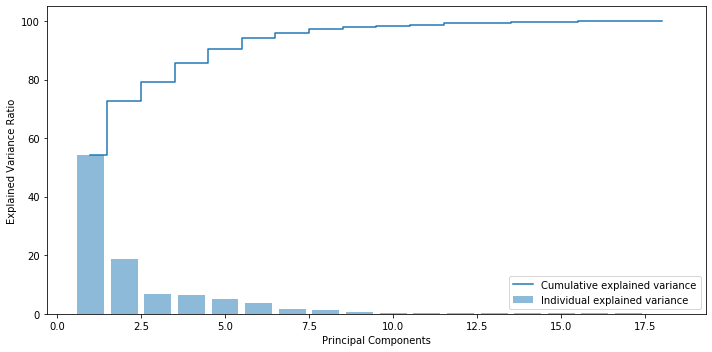

In [179]:
plt.figure(figsize=(10 , 5))
plt.bar(range(1, e_vals.size + 1), var_exp, alpha = 0.5, align = 'center', label = 'Individual explained variance')
plt.step(range(1, e_vals.size + 1), cum_var_exp, where='mid', label = 'Cumulative explained variance')
plt.ylabel('Explained Variance Ratio')
plt.xlabel('Principal Components')
plt.legend(loc = 'best')
plt.tight_layout()
plt.show()

From the analysis above it can be seen that the first 7 principle components explain >95% of the variance.

### Support vector machines and grid search 

In [180]:
pca7 = PCA(n_components=7)
pca7.fit(df_features_scaled)
print(pca7.components_)
print(pca7.explained_variance_ratio_)
Xpca7 = pca7.transform(df_features_scaled)

[[ 0.27250289  0.28725469  0.30242111  0.26971354  0.09786073  0.19520014
   0.31052393 -0.3090069   0.307287    0.27815416  0.29976509  0.30553237
   0.26323762 -0.04193594  0.03608321  0.05872048  0.03801314  0.08474   ]
 [-0.08704358  0.13162176 -0.04614301 -0.19793126 -0.25783995 -0.10804563
   0.07528535 -0.01322994  0.0875602   0.12215424  0.07726575  0.07150302
   0.21058205  0.50362158 -0.01576632 -0.09274624 -0.50162122 -0.50761211]
 [-0.03818521 -0.20114691  0.06346211  0.05628517 -0.06199275 -0.14895782
   0.10904283 -0.09085269  0.1060705  -0.21368469  0.1445998   0.11034374
  -0.20287019  0.07386402 -0.55917399  0.6706805  -0.06224071 -0.04170535]
 [ 0.13867501 -0.03805548  0.10895429 -0.25435509 -0.61276572  0.27867816
   0.00539295  0.06521486  0.03089915  0.04146747 -0.06400509 -0.00219687
  -0.08553965 -0.11539962  0.47370331  0.42842603 -0.0274096   0.09603749]
 [ 0.13710147 -0.13899555 -0.08001743  0.13374437  0.12360146 -0.63489336
   0.08555745 -0.07907344  0.08164

In [181]:
pca7.components_.shape

(7, 18)

In [182]:
Xpca7.shape

(846, 7)

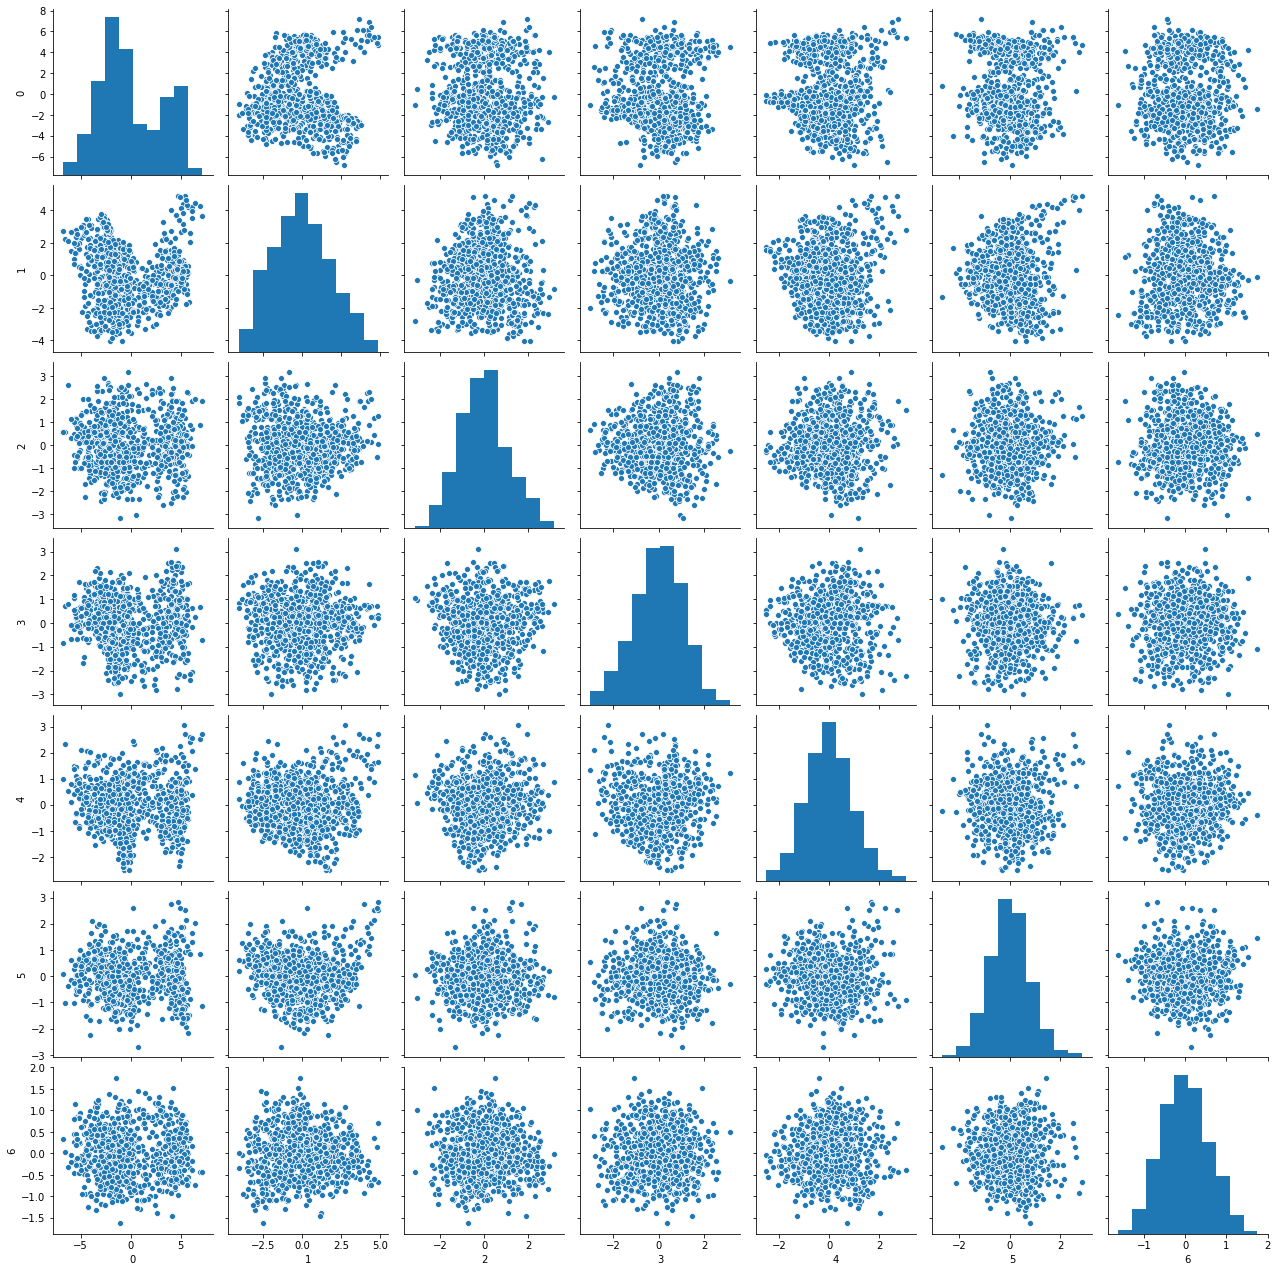

In [183]:
sns.pairplot(pd.DataFrame(Xpca7))

The paiplot shows that there are no features with strongly correlated linear relationships left.

Use SVM and gridsearchCV to find the best parameters and the best accuracy.

In [184]:
estimator = SVC()

params_dict={'kernel':['rbf','linear'], 'C':[0.01,0.05,0.5,1]}

clf_SVC=GridSearchCV(estimator=estimator,
                               param_grid=params_dict, 
                               cv=10)

clf_SVC.fit(Xpca7, Y)

GridSearchCV(cv=10, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': [0.01, 0.05, 0.5, 1],
                         'kernel': ['rbf', 'linear']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [185]:
clf_SVC.best_params_

{'C': 1, 'kernel': 'rbf'}

Note: best_score_ is the mean cross-validated score of the best_estimator

In [186]:
clf_SVC.best_score_

0.9219187675070029

In [187]:
estimator_SVC = SVC(C=1,kernel='rbf')

In [188]:
cv_score = cross_val_score(estimator_SVC, Xpca7, Y, cv=10)

In [189]:
mean_cross_val_score = cv_score.mean()
mean_cross_val_score

0.9219187675070029

In [190]:
cv_predict = cross_val_predict(estimator_SVC, Xpca7, Y, cv=10)

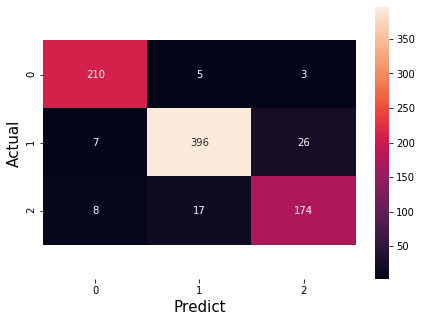

In [191]:
cm=metrics.confusion_matrix(Y, cv_predict)

plt.figure(figsize = (7,5))
ax = sns.heatmap(cm, annot=True, fmt="d")
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)
ax.set_xlabel('Predict', fontsize=15)
ax.set_ylabel('Actual', fontsize=15)
plt.show()

In [192]:
print('Accuracy: ' + str(accuracy_score(Y, cv_predict))) 
print('Precision: '+  str(precision_score(Y, cv_predict, average='macro')))
print('Recall: '+  str(recall_score(Y, cv_predict, average='macro')))

Accuracy: 0.9219858156028369
Precision: 0.9126148705096074
Recall: 0.9202505115556612


Try girdsearch with LGBM to compare performance

In [193]:
params_dict={'n_estimators':[500,1000,1500], 'learning_rate':[0.01,0.05]}

clf_lgbmGS=GridSearchCV(estimator=LGBMClassifier(reg_alpha = 0.1, 
                                                 reg_lambda = 0.1, 
                                                 subsample = 0.8, 
                                                 n_jobs = 1, 
                                                 random_state = 50),
                                                 param_grid=params_dict,
                                                 cv=10)

clf_lgbmGS.fit(Xpca7, Y)

GridSearchCV(cv=10, error_score=nan,
             estimator=LGBMClassifier(boosting_type='gbdt', class_weight=None,
                                      colsample_bytree=1.0,
                                      importance_type='split',
                                      learning_rate=0.1, max_depth=-1,
                                      min_child_samples=20,
                                      min_child_weight=0.001,
                                      min_split_gain=0.0, n_estimators=100,
                                      n_jobs=1, num_leaves=31, objective=None,
                                      random_state=50, reg_alpha=0.1,
                                      reg_lambda=0.1, silent=True,
                                      subsample=0.8, subsample_for_bin=200000,
                                      subsample_freq=0),
             iid='deprecated', n_jobs=None,
             param_grid={'learning_rate': [0.01, 0.05],
                         'n_estimators':

In [194]:
clf_lgbmGS.best_params_

{'learning_rate': 0.01, 'n_estimators': 1500}

In [195]:
clf_lgbmGS.best_score_

0.9172689075630253

In [196]:
estimator_LGBM = LGBMClassifier(n_estimators = 1500,
                                learning_rate = 0.01,
                                reg_alpha = 0.1, 
                                reg_lambda = 0.1, 
                                subsample = 0.8, 
                                n_jobs = 1, 
                                random_state = 50)

In [197]:
cv_score_lgbm = cross_val_score(estimator_LGBM, Xpca7, Y, cv=10)
mean_cross_val_score_lgbm = cv_score_lgbm.mean()
mean_cross_val_score_lgbm

0.9172689075630253

In [198]:
cv_predict_lgbm = cross_val_predict(estimator_LGBM, Xpca7, Y, cv=10)

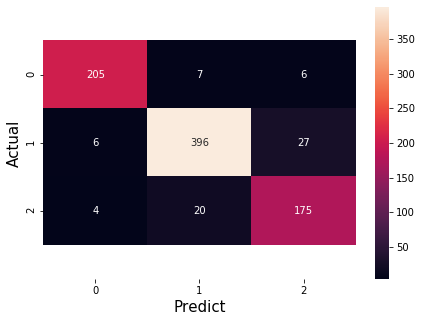

In [199]:
cm=metrics.confusion_matrix(Y, cv_predict_lgbm)

plt.figure(figsize = (7,5))
ax = sns.heatmap(cm, annot=True, fmt="d")
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)
ax.set_xlabel('Predict', fontsize=15)
ax.set_ylabel('Actual', fontsize=15)
plt.show()

In [200]:
print('Accuracy: ' + str(accuracy_score(Y, cv_predict_lgbm))) 
print('Precision: '+  str(precision_score(Y, cv_predict_lgbm, average='macro')))
print('Recall: '+  str(recall_score(Y, cv_predict_lgbm, average='macro')))

Accuracy: 0.91725768321513
Precision: 0.9103349129017114
Recall: 0.9142802934928702


The SVR performed slightly better than the ligh gradient boosted machine.

Object `PCA` not found.
